# Brazilian E-Commerce Dataset by Olist

# 巴西电商olist的数据集分析

这是巴西Olist电子商务的数据集，包含了2016年到2018年在巴西多个市场中进行的10万份订单。

同时，这是一份真实的商业数据，已经被匿名化。

之后他们通过电子邮件的调查形式，收集顾客对于客户满意度的评分,获得了order_review数据集。

官方网站 https://olist.com




数据集中的货币单位为巴西雷亚尔 Brazilian Reais (BRL)

1 BRL = 0.26 USD
一个巴西雷亚尔约等于0.26美金

维基百科页面——巴西雷亚尔 https://en.wikipedia.org/wiki/Brazilian_real


## 0.加载数据集和分析包 

In [1]:
#load packages 加载分析包
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

此数据集已经做过探索性分析（eda）参加 Olist_9_EDA.ipynb文件

In [2]:
#read all csv files 加载数据集

customer = pd.read_csv("olist_customers_dataset.csv")

order = pd.read_csv("order_delivered.csv")

item = pd.read_csv("olist_order_items_dataset.csv")

payment = pd.read_csv("olist_order_payments_dataset.csv")

#### customer数据集

In [3]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
print("In this dataset, the number of customer is :",customer.customer_unique_id.nunique())

In this dataset, the number of customer is : 96096


#### order 数据集

In [6]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,order_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017.0,2017-10-02 11:07:15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018.0,2018-07-26 03:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018.0,2018-08-08 08:55:23
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017.0,2017-11-18 19:45:59
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018.0,2018-02-13 22:20:29


In [7]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96478 entries, 0 to 96477
Data columns (total 10 columns):
order_id                         96478 non-null object
customer_id                      96478 non-null object
order_status                     96478 non-null object
order_purchase_timestamp         96478 non-null object
order_approved_at                96464 non-null object
order_delivered_carrier_date     96476 non-null object
order_delivered_customer_date    96470 non-null object
order_estimated_delivery_date    96478 non-null object
year                             96464 non-null float64
order_date                       96464 non-null object
dtypes: float64(1), object(9)
memory usage: 7.4+ MB


In [8]:
print("In this dataset, the number of the order is :",order.order_id.nunique())

In this dataset, the number of the order is : 96478


#### payment 数据集

In [9]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [11]:
print("In payment dataset, the number of order is :",payment.order_id.nunique())

In payment dataset, the number of order is : 99440


##### 交叉验证payment_value的含义

In [12]:
item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
item_payment = item.merge(payment, how = 'inner', left_on = "order_id", right_on = "order_id")
item_payment.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04


In [14]:
item_payment.query("order_id == '00010242fe8c5a6d1ba2dd792cb16214'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19


In [15]:
print((item_payment["price"] + item_payment["freight_value"]) == item_payment["payment_value"])

0          True
1          True
2          True
3          True
4         False
5         False
6          True
7          True
8          True
9          True
10         True
11        False
12         True
13        False
14        False
15        False
16         True
17         True
18        False
19         True
20         True
21        False
22         True
23         True
24         True
25         True
26         True
27         True
28        False
29         True
          ...  
117571     True
117572     True
117573     True
117574    False
117575     True
117576     True
117577     True
117578     True
117579     True
117580    False
117581     True
117582    False
117583     True
117584    False
117585    False
117586    False
117587     True
117588     True
117589    False
117590    False
117591    False
117592    False
117593    False
117594    False
117595     True
117596     True
117597     True
117598    False
117599    False
117600     True
Length: 117601, dtype: b

In [16]:
item_payment.iloc[13:16]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37,1,boleto,1,126.54
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37,1,boleto,1,126.54
15,0009792311464db532ff765bf7b182ae,1,8cab8abac59158715e0d70a36c807415,530ec6109d11eaaf87999465c6afee01,2018-08-17 12:15:10,99.9,27.65,1,boleto,1,127.55


In [17]:
item_payment_value = item_payment[["order_id","payment_value"]]
item_payment_value.head()

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [18]:
item_payment_value.duplicated().sum()

15141

In [19]:
item_payment_value.drop_duplicates(inplace = True)

In [20]:
item_payment_value.duplicated().sum()

0

In [21]:
item_payment_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102460 entries, 0 to 117600
Data columns (total 2 columns):
order_id         102460 non-null object
payment_value    102460 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


payment_value是总订单金额，在后续分析中不需要区分分期付款的次数

### 1、 Explore the dataset 探索数据集

In [22]:
customer_order = customer.merge(order,how = "inner",left_on = "customer_id",right_on = "customer_id")
customer_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,order_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017.0,2017-05-16 15:22:12
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018.0,2018-01-12 20:58:32
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018.0,2018-05-20 16:19:10
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018.0,2018-03-13 17:29:19
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018.0,2018-07-29 10:10:09


In [23]:
customer_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 96477
Data columns (total 14 columns):
customer_id                      96478 non-null object
customer_unique_id               96478 non-null object
customer_zip_code_prefix         96478 non-null int64
customer_city                    96478 non-null object
customer_state                   96478 non-null object
order_id                         96478 non-null object
order_status                     96478 non-null object
order_purchase_timestamp         96478 non-null object
order_approved_at                96464 non-null object
order_delivered_carrier_date     96476 non-null object
order_delivered_customer_date    96470 non-null object
order_estimated_delivery_date    96478 non-null object
year                             96464 non-null float64
order_date                       96464 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 11.0+ MB


In [24]:
customer_order.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,order_date
7965,38ae941c1e6d3bcc43b271af858d362e,52a16afa8408384e51137ee052adcb0d,39390,bocaiuva,MG,c0f8258a486cbbdd64c2fe207a1960f3,delivered,2018-04-23 22:12:12,2018-04-24 18:56:43,2018-04-27 14:32:00,2018-05-04 07:11:48,2018-05-14 00:00:00,2018.0,2018-04-24 18:56:43
14000,1932595737c305d582e1b11bea15d29c,7354d45bbe478de3b07255c6c441538e,78455,lucas do rio verde,MT,29a9f2a2f7faed6b3457f5325e7d14cd,delivered,2017-09-25 11:16:58,2017-09-25 11:30:29,2017-09-29 14:43:51,2017-10-19 18:19:54,2017-10-26 00:00:00,2017.0,2017-09-25 11:30:29
92158,3ec9d596d9b2c56ecee7bf92e33c9bee,ae46042dc6e613015d5d41e702f3ed53,82620,curitiba,PR,96c1f803bd98812f30e0e72841822e3e,delivered,2018-03-25 21:23:38,2018-03-25 21:35:36,2018-03-27 19:12:08,2018-04-05 17:27:48,2018-04-13 00:00:00,2018.0,2018-03-25 21:35:36
27252,34e69e90823816007ac5518a17f89dc1,0e30f703c154e47face004ec99e38b2e,7160,guarulhos,SP,960f19e6582d2068f7e443036d3a48db,delivered,2017-02-20 17:49:43,2017-02-20 18:02:40,2017-02-23 08:26:13,2017-03-02 09:13:53,2017-03-21 00:00:00,2017.0,2017-02-20 18:02:40
60974,5109f7754f31f131856a4f354bb9d4b1,db03954a9a1cc5e71f6e0f73e81a628c,79170,sidrolandia,MS,3c81b1eb31a46822410a4fb9b43f0678,delivered,2017-10-05 16:48:28,2017-10-05 17:05:32,2017-10-06 13:51:53,2017-10-20 20:29:57,2017-11-08 00:00:00,2017.0,2017-10-05 17:05:32


In [25]:
cus_o_p = customer_order.merge(payment,how = "inner",left_on = "order_id",right_on = "order_id")
cus_o_p.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,order_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017.0,2017-05-16 15:22:12,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018.0,2018-01-12 20:58:32,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018.0,2018-05-20 16:19:10,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018.0,2018-03-13 17:29:19,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018.0,2018-07-29 10:10:09,1,credit_card,8,252.25


In [26]:
cus_o_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100756 entries, 0 to 100755
Data columns (total 18 columns):
customer_id                      100756 non-null object
customer_unique_id               100756 non-null object
customer_zip_code_prefix         100756 non-null int64
customer_city                    100756 non-null object
customer_state                   100756 non-null object
order_id                         100756 non-null object
order_status                     100756 non-null object
order_purchase_timestamp         100756 non-null object
order_approved_at                100742 non-null object
order_delivered_carrier_date     100754 non-null object
order_delivered_customer_date    100748 non-null object
order_estimated_delivery_date    100756 non-null object
year                             100742 non-null float64
order_date                       100742 non-null object
payment_sequential               100756 non-null int64
payment_type                     100756 non-null o

In [27]:
cus_o_p.customer_unique_id.nunique()

93357

In [28]:
cus_o_p.order_status.value_counts()

delivered    100756
Name: order_status, dtype: int64

In [29]:
cus_o_p.to_csv("cus_o_p.csv",index = False)

In [30]:
df = cus_o_p[["customer_unique_id","order_id","order_approved_at","payment_value","year"]]
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df["time"] = df.order_approved_at.values.astype("datetime64[M]")
df.head()

,customer_unique_id,order_id,order_approved_at,payment_value,year,time
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,146.87,2017.0,2017-05-01
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,335.48,2018.0,2018-01-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,157.73,2018.0,2018-05-01
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,173.30,2018.0,2018-03-01
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,252.25,2018.0,2018-07-01


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100756 entries, 0 to 100755
Data columns (total 6 columns):
customer_unique_id    100756 non-null object
order_id              100756 non-null object
order_approved_at     100742 non-null datetime64[ns]
payment_value         100756 non-null float64
year                  100742 non-null float64
time                  100742 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 5.4+ MB


In [32]:
df.isnull().sum()

customer_unique_id     0
order_id               0
order_approved_at     14
payment_value          0
year                  14
time                  14
dtype: int64

目前数据集中的订单状态全部都是delivered，但是order_approved_at中依然还存在14个空值

In [33]:
df.duplicated().sum()

582

由于此数据集中存在一个顾客会存在多条购买记录的情况，

所以所有的重复值都需要保留

#### 支付用户数

In [34]:
df.customer_unique_id.nunique()

93357

#### 用户arpu值

In [35]:
ARPU = df["payment_value"].sum()/df['customer_unique_id'].count()
print("arpu of 2016.9 to 2018.9 is :",ARPU)

arpu of 2016.9 to 2018.9 is : 153.0674279447378


### 商品金额的销售额分析（以月份为单位，以订单为数据粒度）

Text(0, 0.5, 'order_products_value')

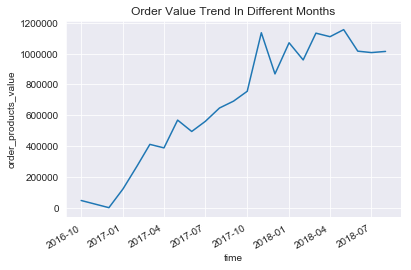

In [36]:
df.groupby('time').payment_value.sum().plot()
plt.title("Order Value Trend In Different Months")
plt.ylabel("order_products_value")

### 分析每个顾客的消费能力

Text(0.5, 0, 'Customer Counts')

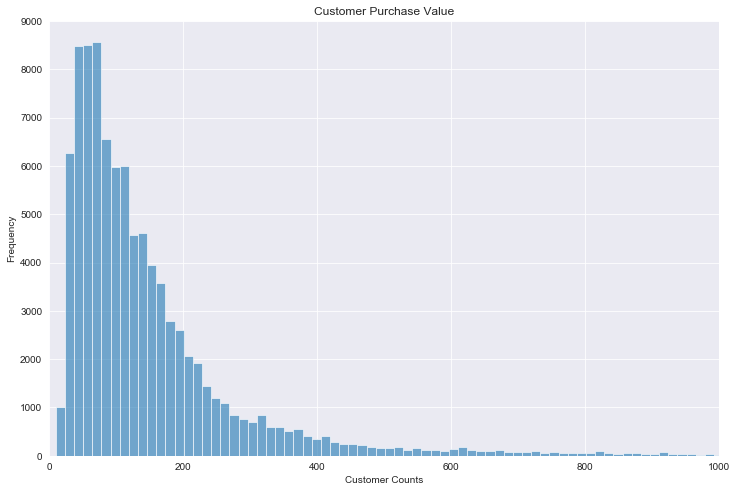

In [37]:
df.groupby('customer_unique_id').sum().payment_value.plot(kind='hist',bins=1000,
                                                          xlim=(0,1000), alpha = 0.6,
                                                          figsize = (12,8))
plt.title("Customer Purchase Value")
plt.xlabel("Customer Counts")

### 用户的复购率

In [38]:
pivoted_counts = df.pivot_table(index = 'customer_unique_id',columns = 'time',
                                values = 'order_approved_at',aggfunc = 'count').fillna(0)

In [39]:
pivoted_counts_tran = pivoted_counts.applymap(lambda x: 1 if x > 1 else np.NaN if x == 0 else 0)

Text(0.5, 1.0, 'Rate For Purchasing')

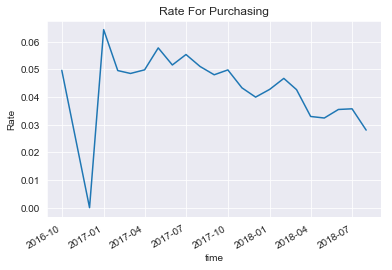

In [40]:
(pivoted_counts_tran.sum()/pivoted_counts_tran.count()).plot()
plt.ylabel("Rate")
plt.title("Rate For Purchasing")

In [41]:
df.query('time == "2016-12"')["order_id"].count()

1

In [42]:
df.query('time == "2016-10"')["order_id"].count()

282

在2016年10月到2016年12月，复购率有一个低谷，

原因从订单量来看，是由于2016年10的订单量是

根据 olist 数据工程师 Andre Sionek 所言，由于 olist 天然的业务性质，决定了顾客的消费的频率不高。

因为 olist 没有自己的商店，主要在各大平台上销售产品，所以没有特别的去培养用户的忠诚度。

另外这虽然是 olist 的真实订单，Andre Sionek所说，这也反映了olist订单整体的情况，是几个销售平台（marketplaces）的集合数据，

而olist并没有公布这些数据的来源。所以在这个报告中，我们仅对数据集中的数据做分析。

从整体来看，无法从复购率这个指标解读出来任何有意义的建议。

### 用户生命周期

In [43]:
(df.groupby('customer_unique_id').order_approved_at.max() - df.groupby('customer_unique_id').order_approved_at.min()).describe()

count                      93344
mean      2 days 15:24:51.838007
std      24 days 23:54:03.813556
min              0 days 00:00:00
25%              0 days 00:00:00
50%              0 days 00:00:00
75%              0 days 00:00:00
max            629 days 20:50:02
Name: order_approved_at, dtype: object

Text(0.5, 1.0, 'Customer Lifetime for Olist')

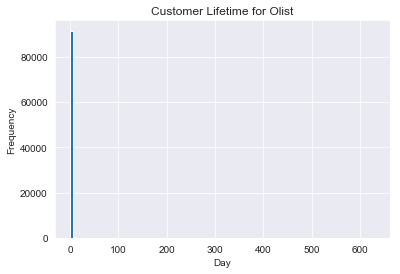

In [44]:
((df.groupby('customer_unique_id').order_approved_at.max() - df.groupby('customer_unique_id').order_approved_at.min())/np.timedelta64(1,'D')).plot(kind = "hist",bins=100)

plt.xlabel("Day")
plt.title("Customer Lifetime for Olist")

Text(0.5, 1.0, 'Customer Lifetime for Olist Without New Customer')

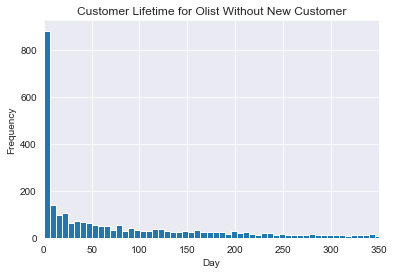

In [45]:
life_time =(df.groupby('customer_unique_id').order_approved_at.max() - df.groupby('customer_unique_id').order_approved_at.min())/np.timedelta64(1,'D')

life_time[life_time > 0].plot(kind = "hist", bins=100, xlim = (0,350))

plt.xlabel("Day")
plt.ylabel("Frequency")
plt.title("Customer Lifetime for Olist Without New Customer")

在数据集中93344个购买顾客中，平均生命周期在2天15小时，

也就是说，平均每个顾客第一次在这个平台上购买产品和最后一次在这个平台上购买产品的时间，

只有2天左右，顾客中最长时间是逗留了629天。

（针对订单中所提供的unique_id而言，但是olist无法识别出同一个顾客在不同电商平台上的id）

### 顾客留存

In [46]:
user_purchase = df[["customer_unique_id","order_id","payment_value","order_approved_at"]]

user_retention = pd.merge(left= user_purchase,right = df.groupby('customer_unique_id').order_approved_at.min().reset_index(),
                          how='inner',on='customer_unique_id',suffixes=('_max','_min'))




In [47]:
user_retention.head()

,customer_unique_id,order_id,payment_value,order_approved_at_max,order_approved_at_min
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,146.87,2017-05-16 15:22:12,2017-05-16 15:22:12
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,335.48,2018-01-12 20:58:32,2018-01-12 20:58:32
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,157.73,2018-05-20 16:19:10,2018-05-20 16:19:10
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,173.30,2018-03-13 17:29:19,2018-03-13 17:29:19
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,252.25,2018-07-29 10:10:09,2018-07-29 10:10:09


In [48]:
user_retention['diff'] = (user_retention['order_approved_at_max'] - user_retention['order_approved_at_min']).apply(lambda x:x/np.timedelta64(1,'D'))

In [49]:
user_retention.head()

,customer_unique_id,order_id,payment_value,order_approved_at_max,order_approved_at_min,diff
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,146.87,2017-05-16 15:22:12,2017-05-16 15:22:12,0.0
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,335.48,2018-01-12 20:58:32,2018-01-12 20:58:32,0.0
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,157.73,2018-05-20 16:19:10,2018-05-20 16:19:10,0.0
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,173.30,2018-03-13 17:29:19,2018-03-13 17:29:19,0.0
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,252.25,2018-07-29 10:10:09,2018-07-29 10:10:09,0.0


将时间分段，查看在不同时间段内的顾客留存趋势。

获得用户每一次消费距第一次消费的时间差值,

将时间差值分桶，这里分成0～3天内，3～7天内，7～15天等，

代表用户当前消费时间距第一次消费属于哪个时间段呢。这里date_diff=0并没有被划分入0～3天，

因为计算的是留存率，如果用户仅消费了一次，留存率应该是0。另外一方面，如果用户第一天内消费了多次，但是往后没有消费，也算作留存率0。

In [50]:
user_retention['diff_bin']= pd.cut(user_retention['diff'],bins=[0,3,7,15,60,90,180,365])

user_retention.describe()

,payment_value,diff
count,100756.000000,100742.000000
mean,153.067428,2.858373
std,214.451418,25.724056
min,0.000000,0.000000
25%,56.780000,0.000000
50%,100.000000,0.000000
75%,171.290000,0.000000
max,13664.080000,629.868079


Text(0.5, 1.0, 'Customer Purchase Diff Bin')

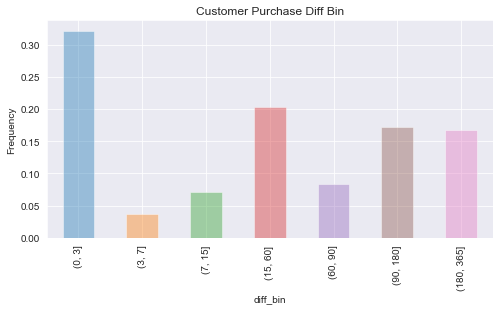

In [51]:
pivoted = user_retention.pivot_table(index='customer_unique_id',columns='diff_bin',
                                     values='payment_value',aggfunc =sum)

pivoted_trans = pivoted.fillna(0).applymap(lambda x:1 if  x>0 else 0)

(pivoted_trans.sum()/pivoted_trans.count()).plot(kind='bar',alpha = 0.4,figsize = (8,4))

plt.ylabel("Frequency")
plt.title("Customer Purchase Diff Bin")

绝大多数的顾客是在0-3天的区间内，少部分的在15-60天和180天到365天，

顾客留存趋势与复购率的趋势相关。

---------
根据 olist 数据工程师 Andre Sionek 所说，

olist的订单极度依靠亚马逊等平台，所以用户对olist这个品牌名没有认知度，

会从olist购买的示例流程是：在亚马逊上购买产品时，在使用“加入购物车”和“现在购买”时，

olist作为卖家排在默认位置，而处于这个位置最好的方法就是降价，比其他卖家提供的价格更低。



所以对于olist来说，这种销售模式，造成他们没有非常必要的理由去做客户忠诚计划，

导致从订单总体来看，与顾客有关的指标，比如顾客忠诚度、复购率都比较低。